In [9]:
import numpy as np
import os
import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
import glob
import glob
import numpy as np
import cv2
from PIL import Image

In [11]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf

In [13]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

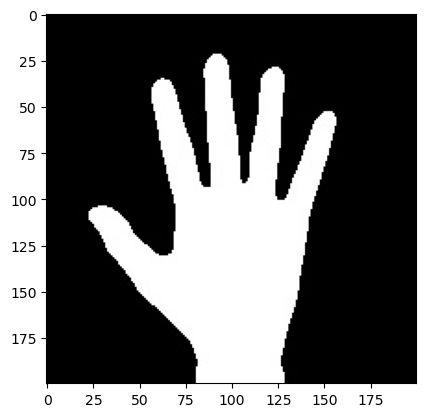

In [15]:
import cv2
cat = cv2.imread('my_dataset/data/five/hand1(984).jpg')
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
# cv2.imshow('image', cat)

my_dataset/data/five/*
2019


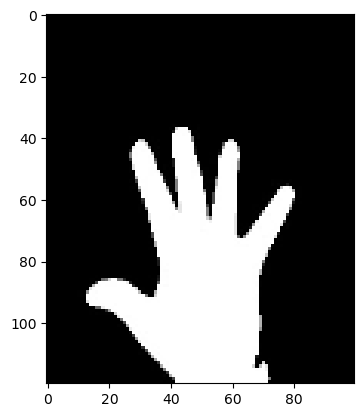

In [27]:
# path to your dataset
DATASET_PATH = 'my_dataset/data/five/'

gesture_path = os.path.join(DATASET_PATH, '*')
print(gesture_path)
import glob
gesture_path = glob.glob(gesture_path)
rand_index = random.randint(0, len(gesture_path))
print(len(gesture_path))
image = cv2.imread(gesture_path[rand_index])
image = cv2.resize(image, [100,120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [29]:
# path to your dataset
DATASET_PATH = 'my_dataset/data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path


['my_dataset/data\\blank',
 'my_dataset/data\\fist',
 'my_dataset/data\\five',
 'my_dataset/data\\ok',
 'my_dataset/data\\thumbsdown',
 'my_dataset/data\\thumbsup']

In [31]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "my_dataset/data/" + str(list_of_gestures[path])
    print(dataset_path)
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    print(len(gest_path))
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,[100, 120])
            loaded_images.append(gray_image)
        k=k+1
    
len(loaded_images)

my_dataset/data/blank
1616
my_dataset/data/ok
1675
my_dataset/data/thumbsup
1618
my_dataset/data/thumbsdown
1641
my_dataset/data/fist
1752
my_dataset/data/five
2019


9600

In [33]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

C:\Users\dhruv\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 118, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 118, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,275,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,295,750 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

In [34]:
outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

len(outputVectors)    

9600

In [36]:
print(len(loaded_images))
print(len(outputVectors))


9600
9600


In [37]:

X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)



(9600, 120, 100)
(9600, 6)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(7680, 120, 100)
(1920, 120, 100)


In [43]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)



In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7680, 100, 120, 1)
(7680, 6)
(1920, 100, 120, 1)
(1920, 6)


In [47]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("hand_gesture_recog_model.h5")

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - categorical_accuracy: 0.6616 - loss: 6.8136 - val_categorical_accuracy: 0.7380 - val_loss: 0.8985
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - categorical_accuracy: 0.8643 - loss: 0.3175 - val_categorical_accuracy: 0.9469 - val_loss: 0.1192
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - categorical_accuracy: 0.9066 - loss: 0.1980 - val_categorical_accuracy: 0.9635 - val_loss: 0.0831
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - categorical_accuracy: 0.9300 - loss: 0.1623 - val_categorical_accuracy: 0.9870 - val_loss: 0.0474
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - categorical_accuracy: 0.9373 - loss: 0.1530 - val_categorical_accuracy: 0.9859 - val_loss: 0.0415
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - categorical_accuracy: 0.9392 - loss: 0.1395 - val_categorical_accuracy: 0.9833 - val_loss: 0.0511
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - categorical_accuracy: 0.9500 - loss: 0.1112 - va

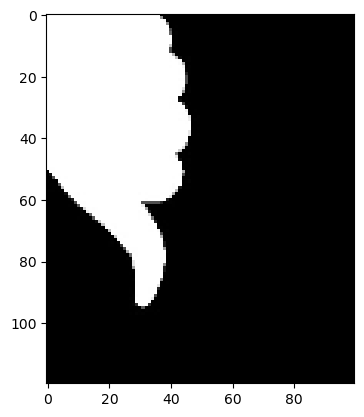

In [60]:
# cat = cv2.imread('gest1_998')
# plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
import cv2
image = cv2.imread('my_dataset/data/thumbsdown/down10.jpg')
image = cv2.resize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [64]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,[100, 120])

gray_image = gray_image.reshape(1, 100, 120, 1)
gray_image.shape

(1, 100, 120, 1)

In [66]:
model.save("trained_number_gesture.h5")

In [67]:
from keras.models import load_model
model = load_model("hand_gesture_recog_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 118, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 118, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,275,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,295,752 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [70]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.9912 - loss: 0.0200
Accuracy: 0.9906250238418579


In [72]:
pred_idx = np.argmax(model.predict_on_batch(gray_image), axis=1)
pred_idx

array([3], dtype=int64)

In [ ]:
# Python Code For testing the Results Using Real time Camera

# organize imports
import cv2
import imutils
import numpy as np
from sklearn.metrics import pairwise
from keras.models import load_model

# global variables
bg = None


def run_avg(image, accumWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, accumWeight)


def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)


def _load_weights():
    try:
        model = load_model("hand_gesture_recog_model.h5")
        print(model.summary())
        # print(model.get_weights())
        # print(model.optimizer)
        return model
    except Exception as e:
        return None


def getPredictedClass(model):

    image = cv2.imread('Temp.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, [100, 120])

    gray_image = gray_image.reshape(1, 100, 120, 1)

    prediction = model.predict_on_batch(gray_image)

    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        return "Blank"
    elif predicted_class == 1:
        return "OK"
    elif predicted_class == 2:
        return "Thumbs Up"
    elif predicted_class == 3:
        return "Thumbs Down"
    elif predicted_class == 4:
        return "Punch"
    elif predicted_class == 5:
        return "High Five"


if __name__ == "__main__":
    # initialize accumulated weight
    accumWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    fps = int(camera.get(cv2.CAP_PROP_FPS))
    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590
    # initialize num of frames
    num_frames = 0
    # calibration indicator
    calibrated = False
    model = _load_weights()
    k = 0
    # keep looping, until interrupted
    while (True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)
        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our weighted average model gets calibrated
        if num_frames < 30:
            run_avg(gray, accumWeight)
            if num_frames == 1:
                print("[STATUS] please wait! calibrating...")
            elif num_frames == 29:
                print("[STATUS] calibration successfull...")
        else:
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))

                # count the number of fingers
                # fingers = count(thresholded, segmented)
                if k % (fps / 6) == 0:
                    cv2.imwrite('Temp.png', thresholded)
                    predictedClass = getPredictedClass(model)
                    cv2.putText(clone, str(predictedClass), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

                # show the thresholded image
                cv2.imshow("Thesholded", thresholded)
        k = k + 1
        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break

    # free up memory
    camera.release()
    cv2.destroyAllWindows()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 118, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 118, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,275,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,295,752 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

None
[STATUS] please wait! calibrating...
[STATUS] calibration successfull...


# 